In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

# Example 1

A well chamber is a device used to measure the radioactivity of a source (typically used in brachytherapy). 

<div>
<img src="images\\well_chamber.png" width="400"/>
</div>

The well is basically an empty cylinder, and the radioactive source can be moved to different points in the blue wire inside the cylinder. Depending on the height $z$ in the cylinder, the device picks up a current $I(z)$. The radioactivity of the source is proportional to the maximum current: 

$$\text{Amount of Radioactivity} = (\text{Constant}) \cdot I_{\text{max}}$$

 Find $I_{\text{max}}$ supposing that one has some $z_{data}$ and $I_{data}$

In [2]:
# Note: This is real data collected from a lab I did in graduate school
z_data = np.array([126.5,126.0,125.5,125.0,124.5,124.0,123.5]) # in cm
I_data = np.array([46.73,47.01,47.13,47.10,46.92,46.58,46.08,]) #in nA

Lets plot the data, so we can get an idea of the function $f(z;\beta)$ that we can use

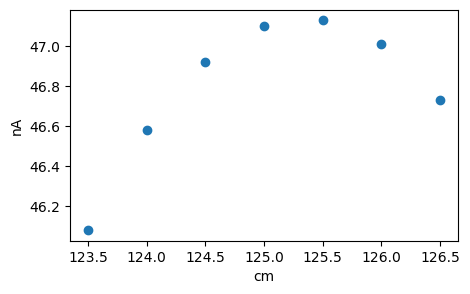

In [3]:
plt.figure(figsize=(5,3))
plt.scatter(z_data, I_data)
plt.xlabel('cm')
plt.ylabel('nA')
plt.show()

This looks quadratic, so we should probably choose a quadratic function. Note that the parameter we're interested in is $I_{max}$. Thus a useful for of $f$ would be

$$f(z;z_{max},I_{max},a) = a \cdot (z-z_{max})^2 + I_{max}$$

where we know $a$ will be negative.

In [4]:
def fit_func(x,zmax,Imax,a):
    return a*(x-zmax)**2 + Imax

In [5]:
popt, pcov = curve_fit(fit_func, z_data, I_data)
zmax_opt, Imax_opt, a_opt = popt

Now we can plot the curve next to the data

In [6]:
z_model = np.linspace(min(z_data), max(z_data), 100)
I_model = fit_func(z_model, *popt)

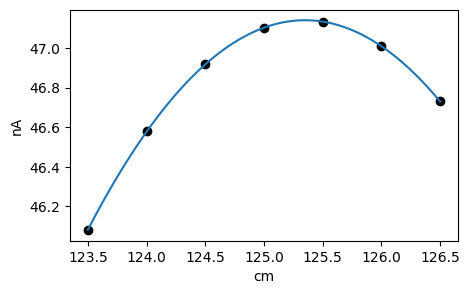

In [7]:
plt.figure(figsize=(5,3))
plt.scatter(z_data, I_data, color='k')
plt.plot(z_model, I_model)
plt.xlabel('cm')
plt.ylabel('nA')
plt.show()

The parameter $I_{max}$ has physical significance here, since it tells us the maximum possible current created by the source in the well counter, and we can use this value to get the true radioactivity.

In [8]:
Imax_opt

47.13996501806949

**Important**

Sometimes you may collect data in a lab with units of very large magnitude. Typically, with curve fitting, you want to make sure all units are near an order of magnitude of 1. We got lucky above since 100 (x axis) and 40 (y axis) are close to 1. But look what happens if we measure our position in nm

In [9]:
z_data = np.array([126.5,126.0,125.5,125.0,124.5,124.0,123.5]) * 1e7 # in nm
I_data = np.array([46.73,47.01,47.13,47.10,46.92,46.58,46.08,]) #in nA

In [10]:
z_data

array([1.265e+09, 1.260e+09, 1.255e+09, 1.250e+09, 1.245e+09, 1.240e+09,
       1.235e+09])

If we try to fit the data, we'll get issues occuring:

In [11]:
popt,perr = curve_fit(fit_func, z_data, I_data)

c:\Users\lukep\anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


As such, its always best to standardize all units close to 1, then multiply appropriately afterwards

* In the example above, it would've been even better practice to measure distance in meters

# Example 2

(This was a lab I did in undergrad). A radioactive source was placed next to a *scintillator detector*, which is connected to a wire. Radiated particles hit the detector, and the amount of current in a wire connected to the scintillator in the wire is propotional to the energy of the detected particle.

$$I = (\text{Some Constant}) \cdot E$$

* In this case, Cs137 was placed next to the scintillator, which always emits photons of the same energy: 662keV.'

The "channel number" $N$ bins the measured current $I$ into different intervals. It is also directly proportional to current ($N \propto I$) and thus 

$$N = (\text{Some Other Constant}) \cdot E$$

In other words, the $x$ axis below is related to energy, and the y axis is related to the number of counted particles at that energy.

In [12]:
df = pd.read_csv('data/scintillator.csv')
x_data = df.Channel.values
y_data = df.Cs137.values
yerr_data = np.sqrt(y_data)

Make a plot

Text(0, 0.5, 'Counts')

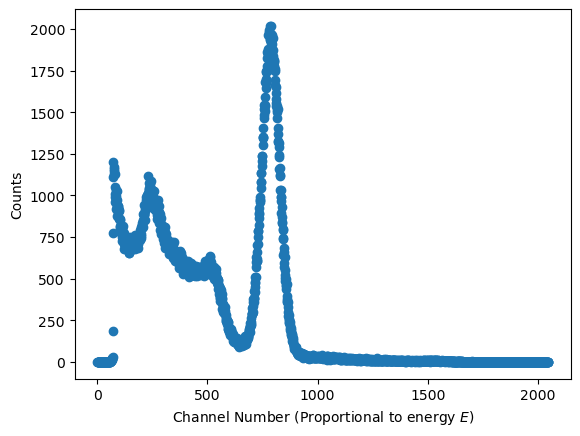

In [13]:
plt.scatter(x_data, y_data)
plt.xlabel('Channel Number (Proportional to energy $E$)')
plt.ylabel('Counts')

Now ideally, since Cs137 always emits particles of the same energy, that curve should really only have a single, infinitely narrow, spike. The stuff on the left is the result the original detected photon entering the scintillator, knocking around other particles, which themselves deposit energy. The main bell curve has a width to it: this is because the scintillator does not have infinite precision for detecting the energy of particles.

* The mean value of the peak tells us about the energy of photons emitted by Cs137
* The Width tells us about the resolution of the detector.

Typically we fit peaks like this to Gaussian curves and use $\mu$ and $\sigma$ to extract information about the two points above (**NOTE: ERROR IN THE VIDEO: SHOULD BE $2\sigma^2$ IN THE DENOMINATOR OF THE EXPONENTIAL**)

$$f(x; A, \mu, \sigma) = Ae^{-(x-\mu)^2/(2\sigma^2)}$$

In [14]:
def gauss_f(x,A,mu,sig):
    return A*np.exp(-(x-mu)**2/(2*sig**2))

In [15]:
x_data[(x_data>725) * (x_data<850)]

array([726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738,
       739, 740, 741, 742, 743, 744, 745, 746, 747, 748, 749, 750, 751,
       752, 753, 754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764,
       765, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777,
       778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 790,
       791, 792, 793, 794, 795, 796, 797, 798, 799, 800, 801, 802, 803,
       804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816,
       817, 818, 819, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829,
       830, 831, 832, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842,
       843, 844, 845, 846, 847, 848, 849], dtype=int64)

First we need to get the region of the data we're interested in

In [16]:
x_data_cropped = x_data[(x_data>725) * (x_data<850)]
y_data_cropped = y_data[(x_data>725) * (x_data<850)]
yerr_data_cropped = yerr_data[(x_data>725) * (x_data<850)]

Plot the subregion

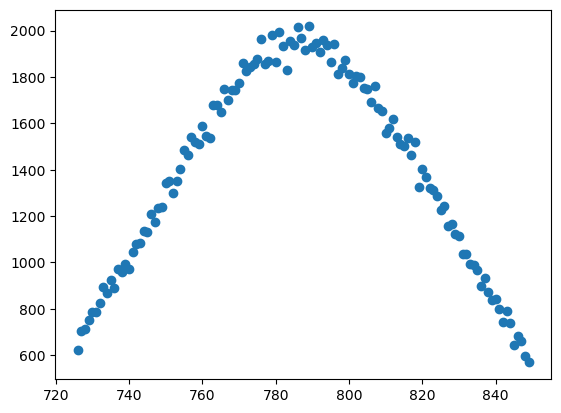

In [17]:
plt.scatter(x_data_cropped, y_data_cropped)
plt.show()

Note: The units are very large on both axes. While we could scale everything to have order of magnitude 1, we can also choose to give appropriate guesses for the parameters in the `p0` argument. In this case, just observing the plot, $A \approx 2000$ (peak height of bell curve), $\mu \approx 790$ (center position of curve in $x$) and $\sigma \approx 60$ (approximate standard deviation of the curve)

In [18]:
popt, pcov = curve_fit(gauss_f, x_data_cropped, y_data_cropped,
             sigma=yerr_data_cropped, p0=[2000, 790, 60])

Get the optimal parameters, and plot next to the data

In [19]:
x_model = np.linspace(min(x_data_cropped), max(x_data_cropped), 1000)
y_model = gauss_f(x_model, *popt)

In [20]:
popt

array([1936.83040968,  786.29515455,   40.92848055])

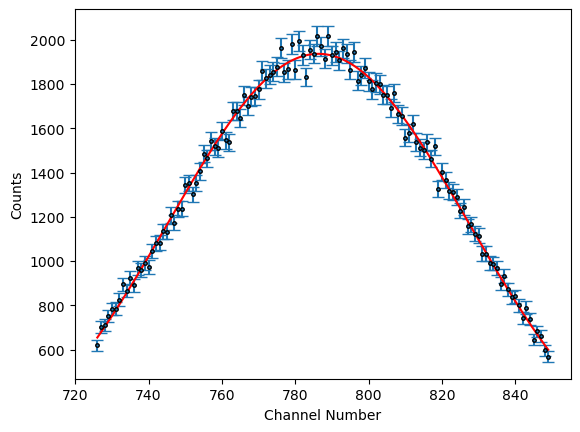

In [21]:
plt.errorbar(x_data_cropped, y_data_cropped, yerr_data_cropped, ls='', capsize=4, marker='.', ms=5, mec='black')
plt.plot(x_model, y_model, color='r')
plt.ylabel('Counts')
plt.xlabel('Channel Number')
plt.show()

**Question**: If the energy (i.e. middle of the peak energy of Cs137 if 662keV), what is the energy resolution (i.e. uncertainty in energy predictions) of the detector. Assume channel number (which is proportional to current measured) is directly proportional to energy

* Let $N$ be the channel number. If the channel number is directly proportional to the energy so that $E = CN$ then $C=E/N$

In [22]:
C = 662 / popt[1]

In [23]:
C

0.8419230312799332

* This factor converts channel number to energy. Since $\sigma$ is represent in channel numbers, we multiply it by $C$ to get the $\sigma$ in units of energy

In [24]:
popt[2] * C

34.45863041004153

* Therefore the uncertainty of the detector is $34.5keV$. (**Note: In medical imaging such as PET and SPECT, where these radiation detectors are used for scans, its desirable to have the uncertainty as low as possible to get the best quality scan**)